In [3]:
from multilayer_neural_network import NeuralNetwork

import numpy as np
from sklearn.datasets import make_classification, make_moons
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score

import matplotlib.pyplot as plt
import matplotlib
from matplotlib.colors import ListedColormap 
matplotlib.style.use('ggplot')
%matplotlib inline

In [25]:
X, Y = make_moons(noise=0.25, random_state=0, n_samples=5000)
Y = np.reshape(Y, newshape=(len(Y), 1))

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3)

X_train = X_train.T
X_test = X_test.T
Y_train = Y_train.T
Y_test = Y_test.T

In [26]:
X.shape, Y.shape, X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((5000, 2), (5000, 1), (2, 3500), (2, 1500), (1, 3500), (1, 1500))

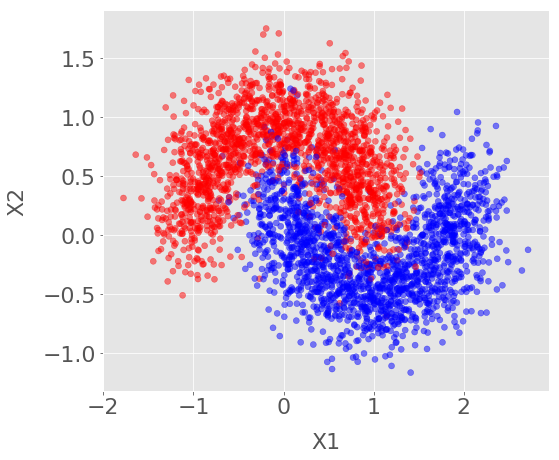

In [27]:
cm = plt.cm.RdBu
cm_bright = ListedColormap(['#FF0000', '#0000FF'])

plt.close('close')
fig, ax = plt.subplots(1, figsize=(8, 7))
ax.scatter(X_train[0,:], X_train[1,:], c=Y_train[0,:], cmap=cm_bright, alpha=0.5)

FONTSIZE = 22
ax.set_xlabel('X1', fontsize=FONTSIZE, labelpad=15)
ax.set_ylabel('X2', fontsize=FONTSIZE, labelpad=15)
for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(FONTSIZE)
    tick.label.set_rotation(0)
for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(FONTSIZE)
    tick.label.set_rotation(0)


In [28]:
layers_dims = [X_train.shape[0], 10, 10, 5, 1]
nn = NeuralNetwork(layers_dims)
costs = nn.fit(X_train, Y_train, learning_rate=0.02, num_iterations=5000)


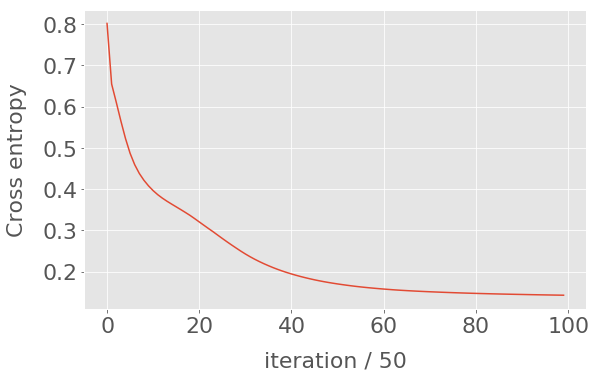

In [29]:
plt.close('close')
fig, ax = plt.subplots(1, figsize=(9, 5.5))
ax.plot(costs)

FONTSIZE = 22
ax.set_xlabel('iteration / 50', fontsize=FONTSIZE, labelpad=15)
ax.set_ylabel('Cross entropy', fontsize=FONTSIZE, labelpad=15)
for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(FONTSIZE)
    tick.label.set_rotation(0)
for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(FONTSIZE)
    tick.label.set_rotation(0)
    

In [30]:
accuracy_train = accuracy_score(Y_train[0,:], nn.predict(X_train)[0,:])
accuracy_test = accuracy_score(Y_test[0,:], nn.predict(X_test)[0,:])


In [31]:
print('training accuracy: {0:.3f}'.format(accuracy_train)) 
print('testing accuracy: {0:.3f}'.format(accuracy_test))

training accuracy: 0.949
testing accuracy: 0.933


In [32]:
roc_auc_train = roc_auc_score(Y_train[0,:], nn.predict_proba(X_train)[0,:])
roc_auc_test = roc_auc_score(Y_test[0,:], nn.predict_proba(X_test)[0,:])

In [33]:
print('training ROC AUC: {0:.3f}'.format(roc_auc_train)) 
print('testing ROC AUC: {0:.3f}'.format(roc_auc_test))

training ROC AUC: 0.988
testing ROC AUC: 0.981
